In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
tf.test. gpu_device_name()

'/device:GPU:0'

In [ ]:
% cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
% pwd

'/content/gdrive/My Drive/Kaggle'

In [ ]:
% ls

Apple-Twitter-Sentiment-DFE.csv    sampleSubmission.csv
apple-twitter-sentiment-texts.csv  sampleSubmission.csv.zip
BitCoinPrice.csv                   sampleSubmission_v2.csv.zip
Bitcoin_tweet_sentiment.csv        saved_models/
BTCUSD_1hr.csv                     submission.csv
BTCUSD_1min.csv                    test.csv
BTCUSD_day.csv                     test_embed_df.csv
Credit_Card_Autoencoder_Model.h5   test.tsv
creditcard.csv                     train.csv
decoder_layer.png                  train_embed_df.csv
decoder.png                        train-sample.csv.zip
encoder_layer.png                  train.tsv
encoder.png                        train_v2.csv
kaggle.json                        transformer.png
Movie_Conversation.csv             tweetsfinal1.csv
movie_conversations.txt            tweetsfinal2.csv
movie_lines.txt                    tweetsfinal3.csv
product_descriptions.csv           tweets_labelled.csv
product_descriptions.csv.zip


In [ ]:
import pandas as pd

columns = ['Char1', 'Char2', 'Movie', 'Dialogue']

df = pd.read_csv('movie_conversations.txt', sep = ' \+\+\+\$\+\+\+ ', engine = 'python', header = None, names = columns)
df

,Char1,Char2,Movie,Dialogue
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']"
1,u0,u2,m0,"['L198', 'L199']"
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']"
3,u0,u2,m0,"['L204', 'L205', 'L206']"
4,u0,u2,m0,"['L207', 'L208']"
...,...,...,...,...
83092,u9028,u9031,m616,"['L666324', 'L666325', 'L666326', 'L666327']"
83093,u9028,u9031,m616,"['L666575', 'L666576']"
83094,u9030,u9034,m616,"['L666256', 'L666257']"
83095,u9030,u9034,m616,"['L666369', 'L666370', 'L666371', 'L666372']"


In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

columns2 = ['Line_id', 'Char_id', 'Movie', 'Char', 'Dialogue']

df2 = pd.read_csv('movie_lines.txt', sep = ' \+\+\+\$\+\+\+ ', engine = 'python', header = None, names = columns2)
df2

,Line_id,Char_id,Movie,Char,Dialogue
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.
...,...,...,...,...,...
304708,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back with my Basutos.
304709,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to the river
304710,L666369,u9030,m616,DURNFORD,"Your orders, Mr Vereker?"
304711,L666257,u9030,m616,DURNFORD,"Good ones, yes, Mr Vereker. Gentlemen who can ride and shoot"


In [ ]:
df2.isna().sum()  #### GOTTA remove

Line_id       0
Char_id       0
Movie         0
Char         43
Dialogue    267
dtype: int64

In [ ]:
# Getting the longest dialogue

import numpy as np

lengths = df2['Dialogue'].str.len()
argmax = np.where(lengths == lengths.max())[0]
df2.iloc[argmax]

,Line_id,Char_id,Movie,Char,Dialogue
182894,L217873,u5313,m352,PARRY,"Then let's begin with the story itself. It's a story of the Grail myth...And although there are several variations, my favorite begins with the Fisher King as a young boy... who had to spend a night alone in the forest to prove his courage... and during that night, he is visited by a sacred vision. Out of the fire, appears the Holy Grail - God's highest symbol of divine grace. And a voice says to the boy, ""You shall be the guardian of the Grail, that it may heal the hearts of men""...But the boy was overcome ...Innocent and foolish, he was blinded by greater visions - a life ahead filled with beauty and glory, hope and power...Tears filled his eyes as he sensed his own... invincibility. A boy's tears of naive wonder and inspiration. and in this state of...radical amazement...he felt for a brief moment, not like a boy, but like God... ...And so he reached into the fire to take the Grail. And the Grail vanished. And the boy hands were left caught in the flames...leaving him wounded and ashamed at what his recklessness had lost him. When he became King, he was determined to reclaim his destiny and find the Grail... But with each year that passed, with each campaign he fought, the Grail remained lost, and this wound he suffered in the fire grew worse... He became a bitter man. Life for him lost it's reason. With each disappointment, with each betrayal... with each loss ... this wound would grow... Soon the land began to spoil from neglect and his people starved...Until finally, the King lost all faith in God's existance and in man's value...He lost his ability to love or be loved And he was so sick with experience... that he started to die. As the years went on, his bravest knights would search for the Grail that would heal their King and make them the most respected and valued men in the land, but to no avail. Pretty soon, finding the Grail became a ruthless struggle between ambitious men vying for the King's power, which only confirmed the King's worst suspicions of man, causing his wound to grow. His only hope, he thought, was death. Then one day, a fool was brought in to the King to cheer him. He was a simple-minded man... not particularly skilled...or admired... He tells the King some jokes...sing him some songs, but the King feels even worse...Finally, the fool says, ""What is it that hurts you so much? How can I help?""...And the King says, ""I need a sip of water to cool my throat""...So, the fool takes a cup from the bedstand, fills it with water and hands it to the King...Suddenly, the King feels a lot better. And when he looks to his hands, he sees that it was the Holy Grail the fool handed him...an ordinary cup that had been beside his bed all along...And the King asks, ""How can this be?...how could you find what all my knights and wisest men could not find""? And the fool answers, ""I don't know. I only knew you were thirsty.""... And for the first time since he was a boy, the King felt more than a man - not because he was touched by God's glory...but rather, by the compassion of a fool."


In [ ]:
df['Dialogue'] = df['Dialogue'].str.replace('[','')
df['Dialogue'] = df['Dialogue'].str.replace(']','')
df['Dialogue'] = df['Dialogue'].str.replace("'",'')
df['Dialogue'] = df['Dialogue'].str.replace(" ",'')

df['Dialogue'] = df['Dialogue'].apply(lambda x: x.split(','))

In [ ]:
type(df['Dialogue'][0])

list

In [ ]:
# df_sample = df.iloc[:500,:]
# df_sample

In [ ]:
import re

def preprocess(text):
  text = text.lower().strip()  # removing leading and trailing whitespaces
  text = re.sub(r'([?.!,])', r' \1', text)  # creating space between word and puctuation following it
  text = re.sub(r'[" "]', " ", text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"she's", "she is", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"that's", "that is", text)
  text = re.sub(r"what's", "that is", text)
  text = re.sub(r"where's", "where is", text)
  text = re.sub(r"how's", "how is", text)
  text = re.sub(r"\'ll", "will", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can't", "cannot", text)
  text = re.sub(r"n't", " not", text)
  text = re.sub(r"n'", "ng", text)
  text = re.sub(r"'bout", "about", text)
  text = re.sub(r"[^a-zA-Z?.!,]+", " ", text)
  text = text.strip()
  return text

# df_final_new['Questions_new'] = df_final_new['Questions'].apply(preprocess)
# df_final_new['Answers_new'] = df_final_new['Answers'].apply(preprocess)

In [ ]:
questions = []
answers = []

for dialogue_list in df['Dialogue']:
  # indices = []
  # for i in range(0, len(dialogue_list)):
  #   temp_idx = df2.index[df2['Line_id'] == dialogue_list[i]].to_list()
  #   indices = df2.loc[temp_idx[0],'Dialogue']
  # print(indices)
  # # if any(index is None for index in indices):
  # #   continue
  for i in range(0, len(dialogue_list)-1):
    idx = df2.index[df2['Line_id'] == dialogue_list[i]].to_list()
    idx2 = df2.index[df2['Line_id'] == dialogue_list[i+1]].to_list()

    if (df2.loc[idx[0],'Dialogue'] == None): continue
    if (df2.loc[idx2[0],'Dialogue'] == None): continue

    question = preprocess(df2.loc[idx[0],'Dialogue'])
    answer = preprocess(df2.loc[idx2[0],'Dialogue'])

    questions.append(question)
    answers.append(answer)

KeyboardInterrupt: ignored

In [ ]:
questions

In [ ]:
answers

In [ ]:
type(questions)

In [ ]:
import pandas as pd
df_final = pd.DataFrame(columns = ['Questions', 'Answers'])
df_final

In [ ]:
df_final['Questions'] = questions
df_final['Answers'] = answers
df_final

In [ ]:
df_final.isna().any()

In [ ]:
df_final.to_csv("/content/gdrive/My Drive/Kaggle/Movie_Conversation.csv")

In [ ]:
import pandas as pd
df_final = pd.read_csv('Movie_Conversation.csv')
df_final

,Unnamed: 0,Questions,Answers
0,0,can we make this quick ? roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad . again .,"well , i thought we would start with pronunciation , if that is okay with you ."
1,1,"well , i thought we would start with pronunciation , if that is okay with you .",not the hacking and gagging and spitting part . please .
2,2,not the hacking and gagging and spitting part . please .,okay . . . then how about we try out some french cuisine . saturday ? night ?
3,3,you are asking me out . that is so cute . that is your name again ?,forget it .
4,4,"no , no , it is my fault we did not have a proper introduction",cameron .
...,...,...,...
221277,221277,"your orders , mr vereker ?",i m to take the sikali with the main column to the river
221278,221278,i m to take the sikali with the main column to the river,lord chelmsford seems to want me to stay back with my basutos .
221279,221279,lord chelmsford seems to want me to stay back with my basutos .,i think chelmsford wants a good man on the border why he fears a flanking attack and requires a steady commander in reserve .
221280,221280,"well i assure you , sir , i have no desire to create difficulties .","and i assure you , you do not in fact i would be obliged for your best advice . what have your scouts seen ?"


In [ ]:
df_final_new = df_final.dropna()

In [ ]:
df_final_new[df_final_new.isnull().any(axis = 1)]

,Unnamed: 0,Questions,Answers


In [ ]:
questions = (df_final_new['Questions']).tolist()
answers = (df_final_new['Answers']).tolist()

In [ ]:
my_dict = {}
for sent in questions+answers:
  words = sent.split(' ')
  for word in words:
    if word in my_dict.keys():
      my_dict[word] = my_dict[word] + 1
    else:
      my_dict[word] = 0

# Total words in text
len(my_dict.keys())

In [ ]:
type(questions)

list

In [ ]:
# Building my own tokenizer from my corpus using TFDS Subword text encoder

import tensorflow_datasets as tfds

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size = 2 ** 13)

In [ ]:
tokenizer.vocab_size

8175

In [ ]:
tokenizer.subwords

In [ ]:
# All tokens are given ids of the format [1], [2], [3] .. So adding two more tokens

START_TOKEN = [tokenizer.vocab_size]
END_TOKEN = [tokenizer.vocab_size + 1]

# so new vocab size becomes
VOCAB_SIZE = tokenizer.vocab_size + 2

In [ ]:
print(questions[0])
print(tokenizer.encode(questions[0]))

can we make this quick ? roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad . again .
[58, 24, 113, 33, 2394, 22, 952, 8039, 2881, 7951, 6125, 4248, 127, 13, 6448, 7951, 3522, 7082, 17, 456, 83, 4049, 6074, 237, 1748, 6909, 834, 1745, 715, 71, 37, 6, 1626, 8019, 3, 229, 1]


In [ ]:
# Tokenize, filter and pad sequences 

from keras_preprocessing.sequence import pad_sequences
import tensorflow as tf

MAX_LENGTH = 40

def tokenize_filter_pad(questions, answers):
  tokenized_inputs = []
  tokenized_outputs = []

  for i in range(len(questions)):
    tokenized_input = START_TOKEN + tokenizer.encode(questions[i]) + END_TOKEN
    tokenized_output = START_TOKEN + tokenizer.encode(answers[i]) + END_TOKEN
    if (len(tokenized_input) <= MAX_LENGTH) & (len(tokenized_output) <= MAX_LENGTH):
      tokenized_inputs.append(tokenized_input)
      tokenized_outputs.append(tokenized_output)

  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_inputs, maxlen = MAX_LENGTH, padding = 'post')    # if you dont specify maxlen, it will length of longest sequence
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(tokenized_outputs, maxlen = MAX_LENGTH, padding = 'post')

  return tokenized_inputs, tokenized_outputs

tokenized_inputs, tokenized_outputs = tokenize_filter_pad(questions, answers)

In [ ]:
tokenized_inputs

array([[8175,   58,   24, ...,    1, 8176,    0],
       [8175,   70,    2, ...,    0,    0,    0],
       [8175,   11,    6, ...,    0,    0,    0],
       ...,
       [8175, 2093, 1058, ...,    0,    0,    0],
       [8175,  200,    4, ...,    0,    0,    0],
       [8175,   13,    4, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# We are going to use the tf.data.Dataset API to contruct our input pipline in order to utilize features like caching and prefetching to speed up the training process.

# Decoder inputs  use previous targets as inputs
# Remove START_TOKEN from targets.. maybe bcz we dont need to predict start token when answering a question

dataset = tf.data.Dataset.from_tensor_slices(({'inputs' : tokenized_inputs, 'dec_inputs' : tokenized_outputs[:,:-1]}, 
                                              {'outputs' : tokenized_outputs[:,1:]}))

# For tf.data.Dataset
strategy = tf.distribute.get_strategy()

BATCH_SIZE = 64 * strategy.num_replicas_in_sync
BUFFER_SIZE = 20000

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
print(dataset)

<PrefetchDataset shapes: ({inputs: (None, 40), dec_inputs: (None, 39)}, {outputs: (None, 39)}), types: ({inputs: tf.int32, dec_inputs: tf.int32}, {outputs: tf.int32})>


The scaled dot-product attention function used by the transformer takes three inputs: Q (query), K (key), V (value). The equation used to calculate the attention weights is:

 
As the softmax normalization is done on the key, its values decide the amount of importance given to the query.

The output represents the multiplication of the attention weights and the value vector. This ensures that the words we want to focus on are kept as is and the irrelevant words are flushed out.

The dot-product attention is scaled by a factor of square root of the depth. This is done because for large values of depth, the dot product grows large in magnitude pushing the softmax function where it has small gradients resulting in a very hard softmax.

In [ ]:
import tensorflow as tf

def scaled_dot_product_attention(query, key, value, mask):   # Calculate the attention weights
  matmul_qk = tf.matmul(query, key, transpose_b = True)
  # scale matmul_qk
  depth = tf.cast(tf.shape(matmul_qk)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)
  # add the mask to zero out padding tokens
  if mask is not None:
    logits += (mask * -1e9)
  # softmax is normalized on the last axis (seq_len_k)
  attention_weights = tf.nn.softmax(logits, axis = -1)
  output = tf.matmul(attention_weights, value)
  return output

In [ ]:
a = [[1,2], [3,4]]
b = tf.cast(tf.shape(a)[-1], tf.float32)

In [ ]:
print(tf.shape(a)[-1])

tf.Tensor(2, shape=(), dtype=int32)


Each multi-head attention block gets three inputs; Q (query), K (key), V (value). These are put through linear (Dense) layers and split up into multiple heads.

The scaled_dot_product_attention defined above is applied to each head (broadcasted for efficiency). An appropriate mask must be used in the attention step. The attention output for each head is then concatenated (using tf.transpose, and tf.reshape) and put through a final Dense layer.

Instead of one single attention head, query, key, and value are split into multiple heads because it allows the model to jointly attend to information at different positions from different representational spaces. After the split each head has a reduced dimensionality, so the total computation cost is the same as a single head attention with full dimensionality.

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name = 'multi_head_attention'):
    super(MultiHeadAttention, self).__init__(name = name)
    self.d_model = d_model
    self.num_heads = num_heads

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units = d_model)
    self.key_dense = tf.keras.layers.Dense(units = d_model)
    self.value_dense = tf.keras.layers.Dense(units = d_model)

    self.dense = tf.keras.layers.Dense(units = d_model)

  def get_config(self):
    config = super(MultiHeadAttention, self).get_config()
    config.update({'d_model' : self.d_model, 'num_heads' : self.num_heads})
    return config

  def split_heads(self, inputs, batch_size):
    inputs = tf.keras.layers.Lambda(lambda inputs : tf.reshape(inputs, shape = (batch_size, -1, self.num_heads, self.depth)))(inputs)
    return tf.keras.layers.Lambda(lambda inputs: tf.transpose(inputs, perm = [0, 2, 1, 3]))(inputs)

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Linear dense layers
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # Split heads
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # Scaled dot product attention
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)
    scaled_attention = tf.keras.layers.Lambda(lambda scaled_attention: tf.transpose(scaled_attention, perm = [0, 2, 1, 3]))(scaled_attention)
    
    # Concatenate of heads / result
    concat_attention = tf.keras.layers.Lambda(lambda scaled_attention: tf.reshape(scaled_attention, (batch_size, -1, self.d_model)))(scaled_attention)

    # Final linear dense layer
    outputs = self.dense(concat_attention)

    return outputs

create_padding_mask and create_look_ahead are helper functions to creating masks to mask out padded tokens, we are going to use these helper functions as tf.keras.layers.Lambda layers.

In [ ]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [ ]:
print(create_padding_mask(tf.constant([[1,2,0,3,0],[0,0,0,4,5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [ ]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

In [ ]:
print(create_look_ahead_mask(tf.constant([[1,2,0,4,5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


Since this model doesn't contain any recurrence or convolution, positional encoding is added to give the model some information about the relative position of the words in the sentence.

The positional encoding vector is added to the embedding vector. Embeddings represent a token in a d-dimensional space where tokens with similar meaning will be closer to each other. But the embeddings do not encode the relative position of words in a sentence. So after adding the positional encoding, words will be closer to each other based on the similarity of their meaning and their position in the sentence, in the d-dimensional space.

In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_config(self):
    config = super(PositionalEncoding, self).get_config()
    config.update({'position': self.position, 'd_model': self.d_model})
    return config

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, ( 2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(position = tf.range(position, dtype = tf.float32)[:, tf.newaxis], i = tf.range(d_model, dtype = tf.float32)[tf.newaxis, :], d_model = d_model)
    # apply sin to even index in the array
    sines = tf.math.sin(angle_rads[:,0::2])
    # apply cos to odd index in the array
    cosines = tf.math.cos(angle_rads[:,1::2])
    pos_encoding = tf.concat([sines, cosines], axis = -1)
    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, : tf.shape(inputs)[1], :]


In [ ]:
sample_pos_encoding = PositionalEncoding(50, 512)

import matplotlib.pyplot as plt

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

Each encoder layer consists of sublayers:

Multi-head attention (with padding mask)
2 dense layers followed by dropout
Each of these sublayers has a residual connection around it followed by a layer normalization. Residual connections help in avoiding the vanishing gradient problem in deep networks.

In [ ]:
def encoder_layer(units, d_model, num_heads, dropout, name = 'encoder_layer'):

  inputs = tf.keras.Input(shape = (None, d_model), name = 'inputs')
  padding_mask = tf.keras.Input(shape = (1, 1, None), name = 'padding_mask')

  attention = MultiHeadAttention(d_model, num_heads, name = 'attention')({'query': inputs, 'key': inputs, 'value': inputs, 'mask': padding_mask})
  attention = tf.keras.layers.Dropout(rate = dropout)(attention)
  add_attention = tf.keras.layers.add([inputs, attention])   # Residual connection
  attention = tf.keras.layers.LayerNormalization(epsilon = 1e-6)(add_attention)

  outputs = tf.keras.layers.Dense(units = units, activation = 'relu')(attention)
  outputs = tf.keras.layers.Dense(units = d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate = dropout)(outputs)
  add_attention = tf.keras.layers.add([attention, outputs])   # Residual connection
  outputs = tf.keras.layers.LayerNormalization(epsilon = 1e-6)(add_attention)

  return tf.keras.Model(inputs = [inputs, padding_mask], outputs = outputs, name = name)

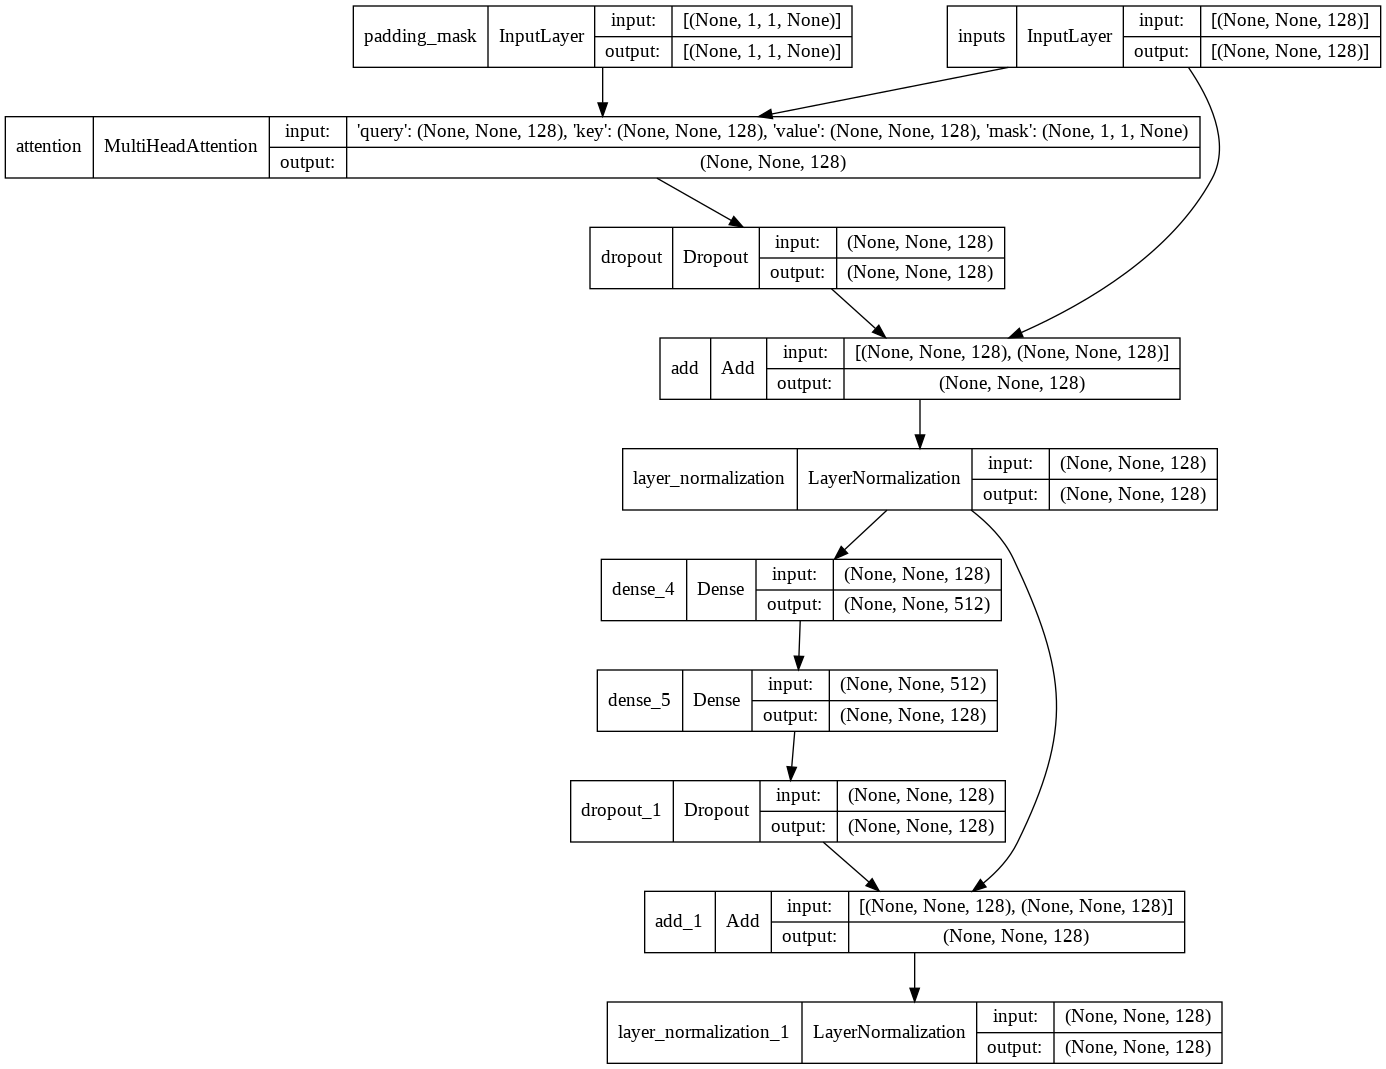

In [ ]:
sample_encoder_layer = encoder_layer(units = 512, d_model = 128, num_heads = 4, dropout = 0.3, name = 'sample_encoder_layer')

tf.keras.utils.plot_model(
    sample_encoder_layer, to_file='encoder_layer.png', show_shapes=True)

The Encoder consists of:

Input Embedding
Positional Encoding
num_layers encoder layers
The input is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the encoder layers. The output of the encoder is the input to the decoder.

In [ ]:
def encoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name = 'encoder'):

  inputs = tf.keras.Input(shape = (None, ), name = 'inputs')
  padding_mask = tf.keras.Input(shape = (1, 1, None), name = 'padding_mask')

  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.keras.layers.Lambda(lambda d_model: tf.math.sqrt(tf.cast(d_model, tf.float32)))(d_model)
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate = dropout)(embeddings)

  for i in range(num_layers):
    outputs = encoder_layer(units = units, d_model = d_model, num_heads = num_heads, dropout = dropout, name = 'encoder_layer_{}'.format(i))([outputs, padding_mask])

  return tf.keras.Model(inputs = [inputs, padding_mask], outputs = outputs, name = name)

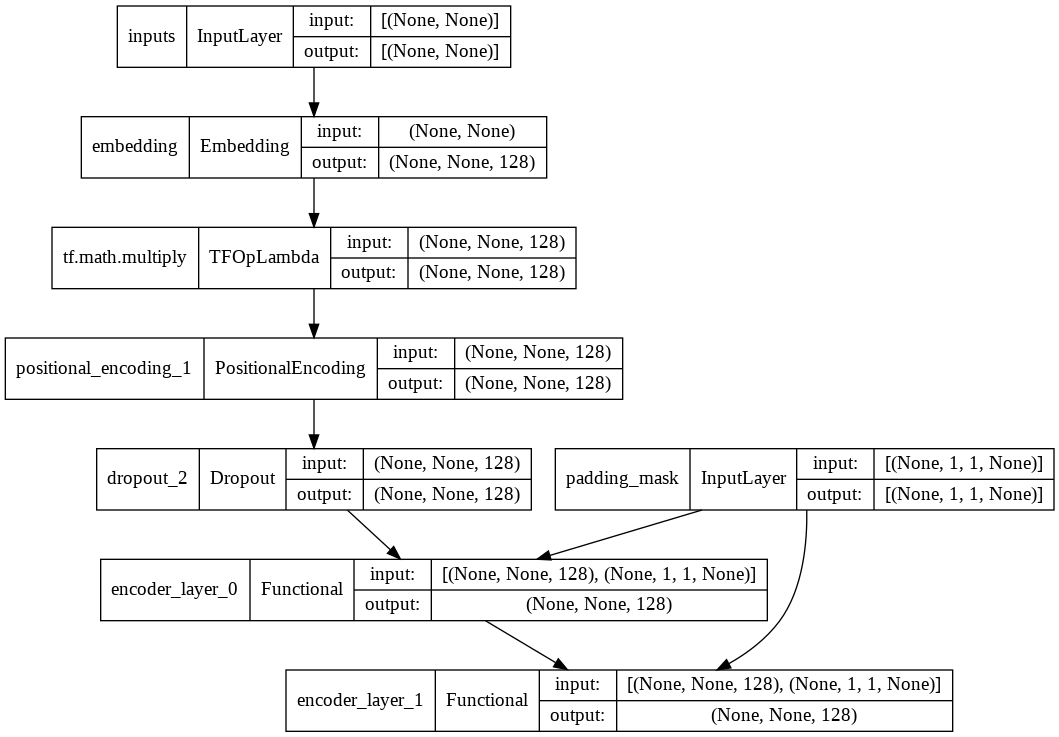

In [ ]:
sample_encoder = encoder(vocab_size = 8192, num_layers = 2, units = 512, d_model = 128, num_heads = 4, dropout = 0.3, name = 'sample_encoder')

tf.keras.utils.plot_model(
   sample_encoder, to_file='encoder.png', show_shapes=True)

Each decoder layer consists of sublayers:

Masked multi-head attention (with look ahead mask and padding mask)
Multi-head attention (with padding mask). value and key receive the encoder output as inputs. query receives the output from the masked multi-head attention sublayer.
2 dense layers followed by dropout
Each of these sublayers has a residual connection around it followed by a layer normalization. The output of each sublayer is LayerNorm(x + Sublayer(x)). The normalization is done on the d_model (last) axis.

In [ ]:
def decoder_layer(units, d_model, num_heads, dropout, name = 'decoder_layer'):

  inputs = tf.keras.Input(shape = (None, d_model), name = 'inputs')
  enc_outputs = tf.keras.Input(shape = (None, d_model), name = 'enc_outputs')
  look_ahead_mask = tf.keras.Input(shape = (1, None, None), name = 'look_ahead_mask')
  padding_mask = tf.keras.Input(shape = (1, 1, None), name = 'padding_mask')

  attention1 = MultiHeadAttention(d_model, num_heads, name = 'attention1')(inputs = {'query': inputs, 'key': inputs, 'value': inputs, 'mask': look_ahead_mask})
  add_attention = tf.keras.layers.add([attention1, inputs])    # Residual connection
  attention1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)(add_attention)

  attention2 = MultiHeadAttention(d_model, num_heads, name = 'attention2')(inputs = {'query': attention1, 'key': enc_outputs, 'value': enc_outputs, 'mask': padding_mask})
  attention2 = tf.keras.layers.Dropout(rate = dropout)(attention2)   
  add_attention = tf.keras.layers.add([attention2, attention1])    # Residual connection
  attention2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)(add_attention)

  outputs = tf.keras.layers.Dense(units = units, activation = 'relu')(attention2)
  outputs = tf.keras.layers.Dense(units = d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate = dropout)(outputs)
  add_attention = tf.keras.layers.add([outputs, attention2])
  outputs = tf.keras.layers.LayerNormalization(epsilon = 1e-6)(add_attention)

  return tf.keras.Model(inputs = [inputs, enc_outputs, look_ahead_mask, padding_mask], outputs = outputs, name = name)

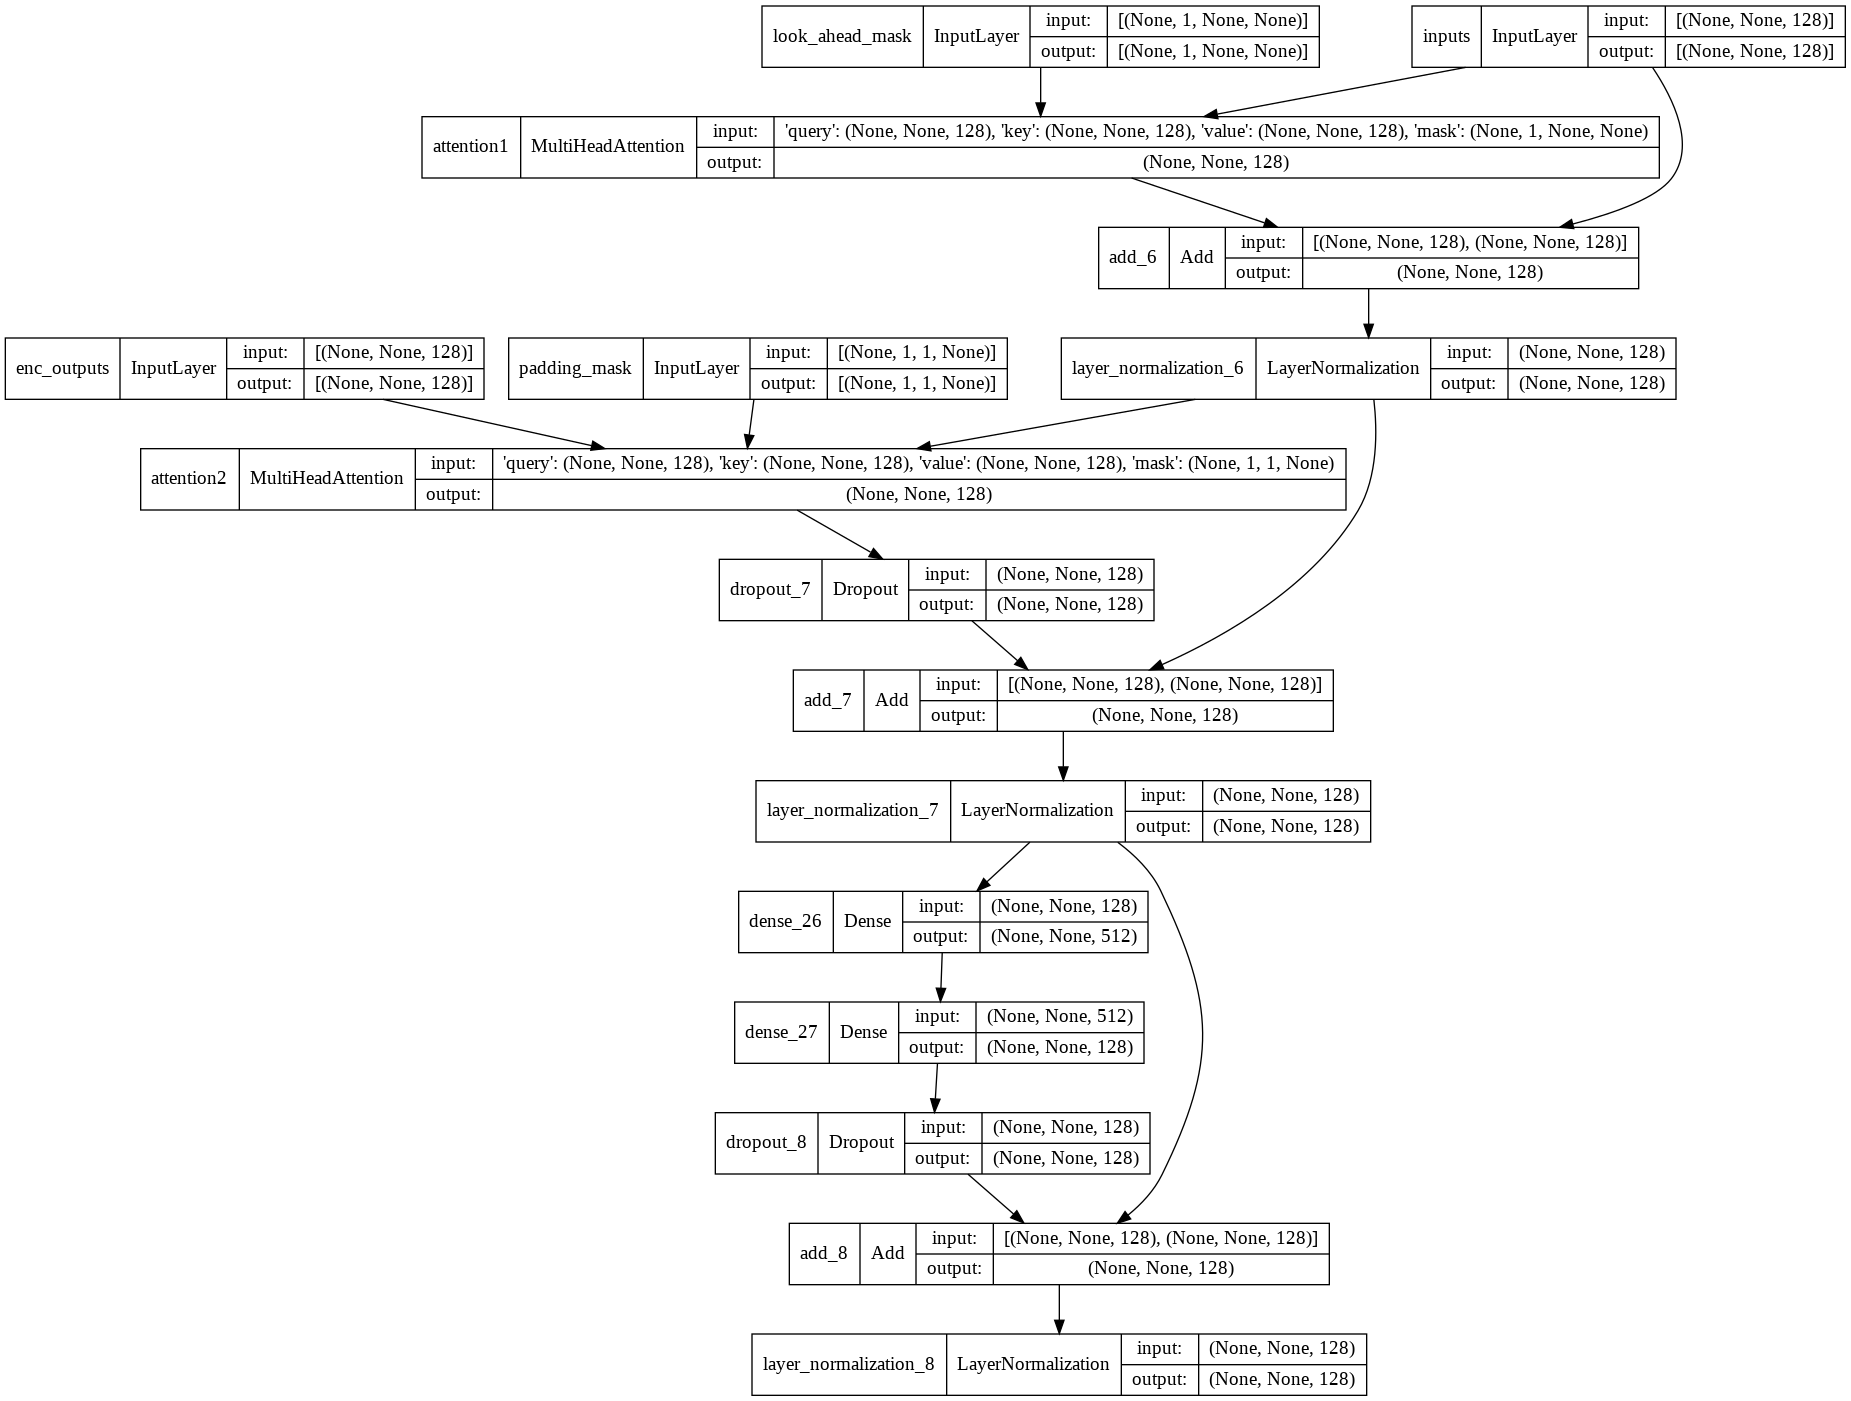

In [ ]:
sample_decoder_layer = decoder_layer(units = 512, d_model = 128, num_heads = 4, dropout = 0.3, name = 'sample_decoder_layer')

tf.keras.utils.plot_model(
    sample_decoder_layer, to_file='decoder_layer.png', show_shapes=True)

The Decoder consists of:

Output Embedding
Positional Encoding
N decoder layers
The target is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the decoder layers. The output of the decoder is the input to the final linear layer.

In [ ]:
def decoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name = 'decoder'):
  
  inputs = tf.keras.Input(shape = (None, ), name = 'inputs')
  enc_outputs = tf.keras.Input(shape = (None, d_model), name = 'encoder_outputs')
  look_ahead_mask = tf.keras.Input(shape = (1, None, None), name = 'look_ahead_mask')
  padding_mask = tf.keras.Input(shape = (1, 1, None), name = 'padding_mask')

  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.keras.layers.Lambda(lambda d_model: tf.math.sqrt(tf.cast(d_model, tf.float32)))(d_model)
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate = dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(units = units, d_model = d_model, num_heads = num_heads, dropout = dropout, name = 'decode_layer_{}'.format(i))(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(inputs = [inputs, enc_outputs, look_ahead_mask, padding_mask], outputs = outputs, name = name)


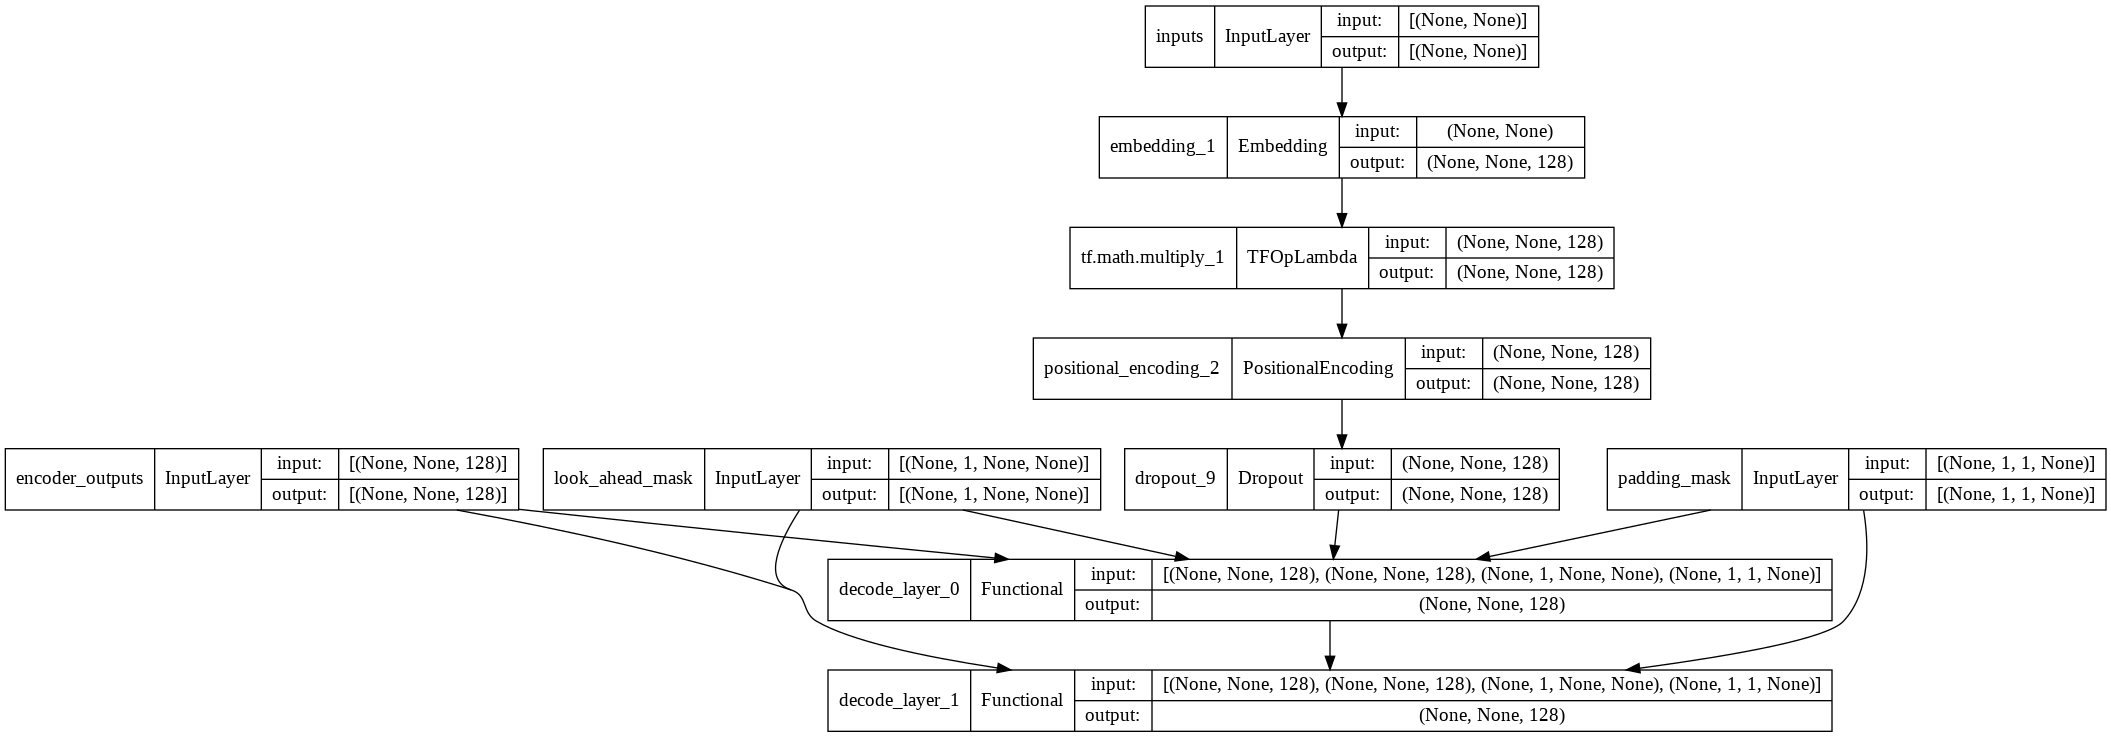

In [ ]:
sample_decoder = decoder(
    vocab_size=8192,
    num_layers=2,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_decoder")

tf.keras.utils.plot_model(
    sample_decoder, to_file='decoder.png', show_shapes=True)

Transformer consists of the encoder, decoder and a final linear layer. The output of the decoder is the input to the linear layer and its output is returned.

In [ ]:
def transformer(vocab_size, num_layers, units, d_model, num_heads, dropout, name = 'transformer'):
  
  inputs = tf.keras.Input(shape = (None, ), name = 'inputs')
  dec_inputs = tf.keras.Input(shape = (None, ), name = 'dec_inputs')

  enc_padding_mask = tf.keras.layers.Lambda(create_padding_mask, output_shape = (1, 1, None), name = 'enc_padding_mask')(inputs)
  look_ahead_mask = tf.keras.layers.Lambda(create_look_ahead_mask, output_shape = (1, None, None), name = 'look_ahead_mask')(dec_inputs)  # mask the future tokens for decoder inputs at the 1st attention block
  dec_padding_mask = tf.keras.layers.Lambda(create_padding_mask, output_shape = (1, 1, None), name = 'dec_padding_mask')((inputs))  # mask the encoder outputs for the 2nd attention block

  enc_outputs = encoder(vocab_size = vocab_size, num_layers = num_layers, units = units, d_model = d_model, num_heads = num_heads, dropout = dropout)(inputs = [inputs, enc_padding_mask])

  dec_outputs = decoder(vocab_size = vocab_size, num_layers = num_layers, units = units, d_model = d_model, num_heads = num_heads, dropout = dropout)(inputs = [dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  outputs = tf.keras.layers.Dense(units = vocab_size, name = 'outputs')(dec_outputs)

  return tf.keras.Model(inputs = [inputs, dec_inputs], outputs = outputs , name = name)

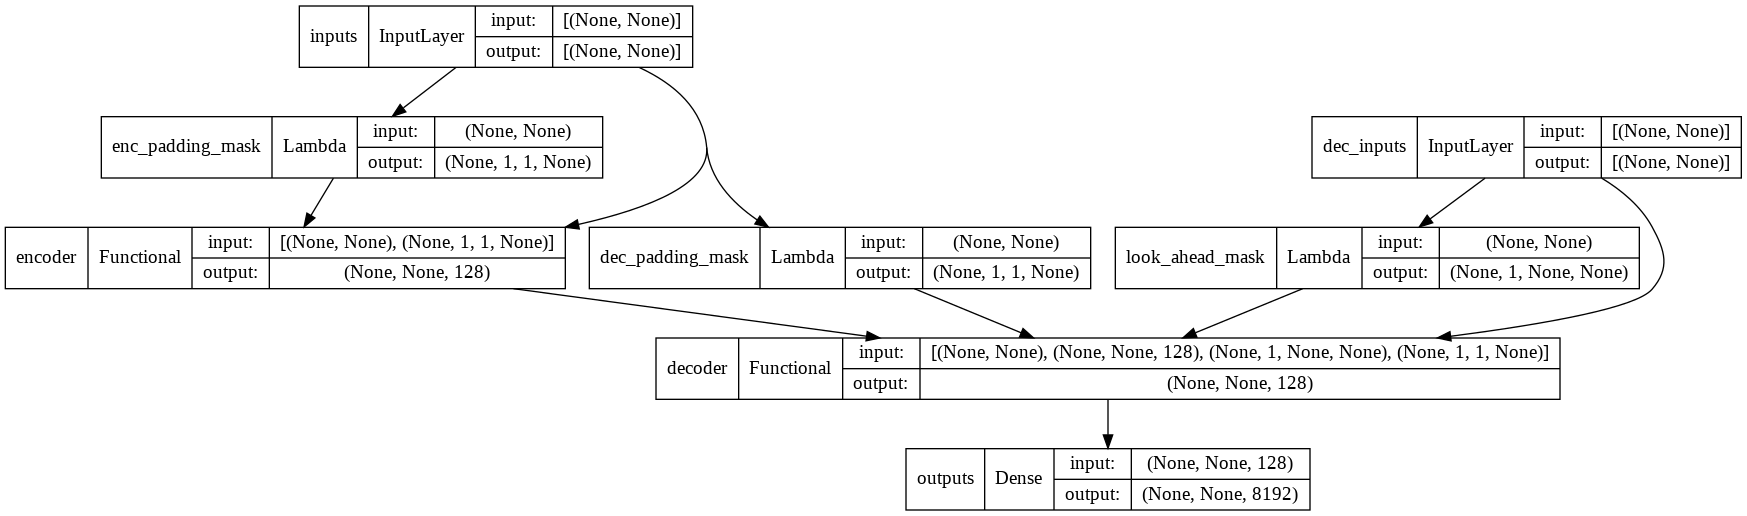

In [ ]:
sample_transformer = transformer(
    vocab_size=8192,
    num_layers=4,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_transformer")

tf.keras.utils.plot_model(
    sample_transformer, to_file='transformer.png', show_shapes=True)

Loss function
Since the target sequences are padded, it is important to apply a padding mask when calculating the loss.

In [ ]:
## Training the model

# Maximum sentence length
MAX_LENGTH = 40

# Maximum number of samples to preprocess
MAX_SAMPLES = 50000

# For tf.data.Dataset
BATCH_SIZE = 64 * strategy.num_replicas_in_sync
BUFFER_SIZE = 20000

# For Transformer
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

EPOCHS = 1


def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape = (-1, MAX_LENGTH-1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = 'none')(y_true, y_pred)
  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)
  return tf.reduce_mean(loss)

Custom learning rate
Use the Adam optimizer with a custom learning rate scheduler according to the formula in the paper.

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  
  def __init__(self, d_model, warmup_steps = 4000):
    super(CustomSchedule, self).__init__()

    self.d_model = tf.constant(d_model, dtype = tf.float32)
    self.warmup_steps = warmup_steps

  def get_config(self):
    return {'d_model': self.d_model, 'warmup_steps': self.warmup_steps}

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)
    print(tf.math.multiply(tf.math.rsqrt(self.d_model), tf.math.minimum(arg1, arg2)))
    return tf.math.multiply(tf.math.rsqrt(self.d_model), tf.math.minimum(arg1, arg2))

tf.Tensor(
[0.0000000e+00 3.4938563e-07 6.9877126e-07 ... 1.9764384e-04 1.9764334e-04
 1.9764285e-04], shape=(200000,), dtype=float32)


Text(0.5, 0, 'Train Step')

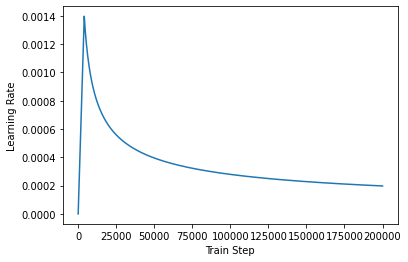

In [ ]:
sample_learning_rate = CustomSchedule(d_model = 128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

Initialize and compile model with our predefined custom learning rate and Adam optimizer under the strategy scope.

In [ ]:
# Clear backend

tf.keras.backend.clear_session()

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1 = 0.9, beta_2 = 0.98, epsilon = 1e-9, clipvalue = 0.5)

def accuracy(y_true, y_pred):
  # ensure labels have shape (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape = (-1, MAX_LENGTH-1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# initialize and compile model with strategy scope
with strategy.scope():
  model = transformer(vocab_size = VOCAB_SIZE, num_layers = NUM_LAYERS, units = UNITS, d_model = D_MODEL, num_heads = NUM_HEADS, dropout = DROPOUT)

  model.compile(optimizer = optimizer, loss = loss_function, metrics = [accuracy])

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    3147520     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0

In [ ]:
model.fit(dataset, epochs = EPOCHS)

Tensor("Adam/Mul_1:0", shape=(), dtype=float32, device=/job:localhost/replica:0/task:0/device:CPU:0)
Tensor("Adam/Mul_1:0", shape=(), dtype=float32, device=/job:localhost/replica:0/task:0/device:CPU:0)
3038/3038 [==============================] - 5520s 2s/step - loss: 1.5995 - accuracy: 0.0731


In [ ]:
# # Saving the model
# from tensorflow.keras.models import save_model

# # model.save('/content/gdrive/My Drive/Kaggle/Harry_Potter_Movie_Dialogue_Model.h5')
# # save_model(model = model, filepath = '/content/gdrive/My Drive/Kaggle/Harry_Potter_Movie_Dialogue_Model.h5')

# # from tensorflow.keras.models import load_model

# # loaded_model = load_model('/content/gdrive/My Drive/Kaggle/Harry_Potter_Movie_Dialogue_Model.h5')



model.save_weights('/content/gdrive/My Drive/Kaggle/Movie_Dialogue_Model1.h5')

# # model.load_weights('/content/gdrive/My Drive/Kaggle/Harry_Potter_Movie_Dialogue_Model.h5')

In [ ]:
with strategy.scope():
  model1 = transformer(vocab_size = VOCAB_SIZE, num_layers = NUM_LAYERS, units = UNITS, d_model = D_MODEL, num_heads = NUM_HEADS, dropout = DROPOUT)

  model1.compile(optimizer = optimizer, loss = loss_function, metrics = [accuracy])

model1.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    3147520     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0

In [ ]:
model1.load_weights('/content/gdrive/My Drive/Kaggle/Movie_Dialogue_Model1.h5')

The following steps are used for evaluation:

Apply the same preprocessing method we used to create our dataset for the input sentence.
Tokenize the input sentence and add START_TOKEN and END_TOKEN.
Calculate the padding masks and the look ahead masks.
The decoder then outputs the predictions by looking at the encoder output and its own output.
Select the last word and calculate the argmax of that.
Concatentate the predicted word to the decoder input as pass it to the decoder.
In this approach, the decoder predicts the next word based on the previous words it predicted.
Note: The model used here has less capacity and trained on a subset of the full dataset, hence its performance can be further improved.

In [ ]:

def evaluate(sentence, print_tokens):
  sentence = preprocess(sentence)
  # print(sentence)
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)
  # print(sentence)
  output = tf.expand_dims(START_TOKEN, 0)
  print(output)
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # select the last word from the seq_len dimension
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    if print_tokens == True:
      print(predicted_id)
    # return the result if the predicted_id is equal to the end token
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # concatenated the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)


def predict(sentence, print_tokens = True):
  prediction = evaluate(sentence, print_tokens)
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('\n\nInput: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [ ]:
# Printing the tokens along with the output

output = predict('what do you mean')

tf.Tensor([[8175]], shape=(1, 1), dtype=int32)
tf.Tensor([[4]], shape=(1, 1), dtype=int32)
tf.Tensor([[25]], shape=(1, 1), dtype=int32)
tf.Tensor([[11]], shape=(1, 1), dtype=int32)
tf.Tensor([[69]], shape=(1, 1), dtype=int32)
tf.Tensor([[8]], shape=(1, 1), dtype=int32)
tf.Tensor([[48]], shape=(1, 1), dtype=int32)
tf.Tensor([[12]], shape=(1, 1), dtype=int32)
tf.Tensor([[62]], shape=(1, 1), dtype=int32)
tf.Tensor([[16]], shape=(1, 1), dtype=int32)
tf.Tensor([[72]], shape=(1, 1), dtype=int32)
tf.Tensor([[1]], shape=(1, 1), dtype=int32)
tf.Tensor([[8176]], shape=(1, 1), dtype=int32)


Input: what do you mean
Output: i m not going to get it out of here .


In [ ]:
# Without printing tokens

output = predict('You will, dont worry', False)

tf.Tensor([[8175]], shape=(1, 1), dtype=int32)


Input: You will, dont worry
Output: i m not going to get out of here .


In [ ]:
# Without printing tokens

output = predict('I think you are just being paranoid', False)

tf.Tensor([[8175]], shape=(1, 1), dtype=int32)


Input: I think you are just being paranoid
Output: i m sorry . i m sorry . i m sorry . i m not going to be a lot of people who can get to me .
